In [1]:
!ls

product_reviews          scrapy.cfg
product_reviews.csv      sentiment_analysis.ipynb


In [2]:
# Essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [3]:
product = pd.read_csv('product_reviews.csv')
product.head()

,rating,review
0,5 stars: Excellent,Amazing service
1,5 stars: Excellent,"<p class=""review-content__text"">\n ..."
2,5 stars: Excellent,"<p class=""review-content__text"">\n ..."
3,1 star: Bad,"<p class=""review-content__text"">\n ..."
4,5 stars: Excellent,"<p class=""review-content__text"">\n ..."


In [6]:
product['rating_star'] = product['rating'].apply(lambda x: x.split()[0])
product['rating_verdict'] = product['rating'].apply(lambda x: x.split()[-1])

In [7]:
product['rating_verdict'].replace("Great","Excellent",inplace = True)
product['rating_verdict'].replace("Bad","Poor",inplace=True)

In [8]:
product['rating_verdict'].value_counts()

Excellent    3446
Poor          880
Average       318
Name: rating_verdict, dtype: int64

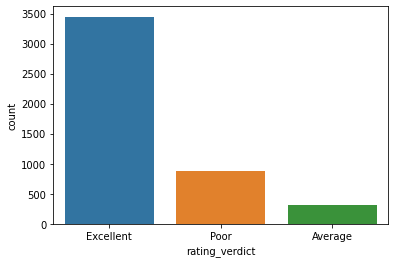

In [9]:
sns.countplot(product['rating_verdict'])

In [10]:
filtered_df = product.drop(index = product[product['rating_verdict']=='Average'].index)

In [11]:
len(filtered_df)

4326

In [ ]:
filtered_df

In [ ]:
filtered_df['rating_verdict'].replace("Excellent", 1,inplace = True)
filtered_df['rating_verdict'].replace("Poor", 0,inplace = True)

In [ ]:
filtered_df.drop(['rating','rating_star'],axis=1,inplace=True)

In [ ]:
filtered_df

In [ ]:
msk = np.random.rand(len(filtered_df)) < 0.8

In [ ]:
filtered_df_train = filtered_df[msk]
filtered_df_test = filtered_df[msk]

In [ ]:
review_list = filtered_df['review'].to_list()
sentiment = filtered_df['rating_verdict'].to_list()

In [ ]:
len(review_list)

In [ ]:
len(sentiment)

In [ ]:
for i in range(10):
    print(review_list[i])

In [ ]:
review_list[5]

In [ ]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [ ]:
deEmojify(review_list[5])

In [ ]:
review_list = [deEmojify(review) for review in review_list]

In [ ]:
for i in range(10):
    print(review_list[i])

In [ ]:
pattern_space = re.compile(r'\s*')
pattern_line = re.compile(r'\n')

In [ ]:
matches_space = pattern_space.finditer(review_list[1])
matches_line = pattern_line.finditer(review_list[1])

In [ ]:
for match in matches_space:
    print(match.start(),match.end(),match.group())

In [ ]:
for match in matches_line:
    print(match.start(),match.end(),match.group())

### For substitution, we need to look for the appropriate patterns

In [ ]:
pattern_without_space = re.compile(r'(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)')
pattern_with_space = re.compile(r'(<br\s*/><br\s*/>)|(\-)|(\/)|(<p class="review-content__text">)|(</p>)|<br>')
NO_SPACE = ""
SPACE = " "

In [ ]:
def preprocess_reviews(reviews):
    
    reviews = [pattern_without_space.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [pattern_with_space.sub(SPACE, line) for line in reviews]
    
    return reviews


In [ ]:
review_list = preprocess_reviews(review_list)

In [ ]:
for review in review_list[:30]:
    print(review)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    review_list, sentiment, train_size = 0.75
)

In [ ]:
cv = CountVectorizer(binary=True,ngram_range=(1,2))
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))

In [ ]:
X_train = cv.fit_transform(X_train)
X_val = cv.transform(X_val)

In [ ]:
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

In [ ]:
final_model = LogisticRegression(C=0.25)

In [ ]:
X = cv.fit_transform(review_list)
final_model.fit(X,sentiment) 

In [ ]:
X.shape

In [ ]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    
print('-'*30)    

for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)
    


In [ ]:
string1 = "The movie was excellent. I'll go again and watch it!"
string2 = "It's a poorly made movie . Never watching it again!"
string3 = "bad!"


In [ ]:
lst = [string1,string2,string3]

In [ ]:
lst = preprocess_reviews(lst)

In [ ]:
array = cv.transform(lst)

In [ ]:
array.shape

In [ ]:
final_model.predict(array)

## Everything is ready! Just need to play with the parameters!